In [1]:
%matplotlib widget

import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm
from custom import weather

matplotlib.rcParams['font.family'] = ['PingFang HK']
def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)
def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)

%load_ext autoreload
%autoreload 2

### load from saved dataframe

In [2]:
## the weather station list
df = pd.read_csv('all_station_20201126.csv')
df.shape

(608, 16)

In [3]:
df[(df.data_duration>=12) & (df.data_duration<=23)]

,stn_code,stn_name,altitude,Longitude,Latitude,city,address,data_start_date,stn_end_date,comment,orig_stn_code,new_stn_code,data_start_date2,data_duration,data_duration2,data_period
77,C0AI30,三重,26.0,121.500629,25.057328,新北市,三重區環河南路100號,2019/08/02,NaN,原(C0A9I1)站因移位，於2019/8/2變更為(C0AI30)站。,C0A9I1,NaN,2019-08-02,15,1年3個月,2019/08/02-2020/11/26
78,C0AI40,石牌,35.0,121.513167,25.115601,臺北市,北投區石牌路一段139號(石牌國中自強樓頂樓),2019/09/10,NaN,原(C0A9B0)站因移位，於2019/9/10變更為(C0AI40)站。,C0A9B0,NaN,2019-09-10,14,1年2個月,2019/09/10-2020/11/26
93,C0C710,大溪永福,143.0,121.324975,24.892936,桃園市,大溪區信義路1165號（永福國小）,2018/12/26,NaN,NaN,NaN,NaN,2018-12-26,23,1年11個月,2018/12/26-2020/11/26
172,C0G900,線西,20.0,120.443536,24.143358,彰化縣,線西鄉慶福路300號（彰濱工業區線西服務大樓內),2019/11/22,NaN,NaN,NaN,NaN,2019-11-22,12,1年0個月,2019/11/22-2020/11/26
266,C0R320,車城,7.0,120.716073,22.074033,屏東縣,車城鄉福興村中山路66號(車城國小),2019/11/28,NaN,因擴充氣象站，原氣象站(C1R320)，於2019/11/28升級為氣象站，變更站碼為(C0...,C1R320,NaN,2019-11-28,12,1年0個月,2019/11/28-2020/11/26
267,C0R341,牡丹,230.0,120.792639,22.130036,屏東縣,199縣道23K-23.5K間車城往旭海方向之右側,2019/11/28,NaN,因擴充氣象站，原氣象站(C1R340)，於2019/11/28升級為氣象站，變更站碼為(C0...,C1R340,NaN,2019-11-28,12,1年0個月,2019/11/28-2020/11/26
269,C0R440,大漢山,1654.0,120.753181,22.405264,屏東縣,春日鄉大漢山頂,2019/11/28,NaN,因擴充氣象站，原氣象站(C1R440)，於2019/11/28升級為氣象站，變更站碼為(C0...,C1R440,NaN,2019-11-28,12,1年0個月,2019/11/28-2020/11/26
286,C0R660,枋寮,20.0,120.590647,22.367722,屏東縣,枋寮鄉枋寮村德興路197號(枋寮國小),2019/11/28,NaN,NaN,NaN,NaN,2019-11-28,12,1年0個月,2019/11/28-2020/11/26
287,C0R670,楓港,26.0,120.692156,22.190131,屏東縣,枋山鄉善餘村光復路24號(楓港國小),2019/11/28,NaN,NaN,NaN,NaN,2019-11-28,12,1年0個月,2019/11/28-2020/11/26
288,C0R680,佳樂水,13.0,120.861633,21.993578,屏東縣,滿州鄉佳樂水風景區內,2019/11/28,NaN,NaN,NaN,NaN,2019-11-28,12,1年0個月,2019/11/28-2020/11/26


In [4]:
## keep only stations with data more than 1 year
df = df[df.data_duration>=12]
df.shape

(586, 16)

## Load cleaned weather data

In [9]:
df_w = pd.read_pickle('weather_all_cleaned_20201228.bz2')

## keep only records of selected stations (duration <12months)
df_w = df_w.loc[df.stn_code]

### further cleanup the nan values

In [10]:
df_w.isna().sum()

StnPres         5806
StnPresMax     13199
StnPresMin     13236
Temperature     6244
T Max          14345
T Min          14528
RH             64383
RHMin          62485
WS              6493
WD              6582
WSGust         13372
WDGust         13368
Precp           5991
PresDif        13242
TempDif        14891
RHDif          73531
dtype: int64

In [11]:
df_w.drop(columns=['StnPres', 'StnPresMax', 'StnPresMin', 'RHMin', 'PresDif', 'TempDif', 'RHDif'], inplace=True)

In [12]:
missing = df_w.reset_index().groupby('stn_code').apply(lambda x: x.isna().sum()).drop(columns=['stn_code', 'date'])
missing = missing[missing.sum(axis=1)>0]
missing = df[['stn_code', 'stn_name']].merge(missing, left_on='stn_code', right_index=True)

In [13]:
missing.iloc[:, 2:].idxmax(), missing.iloc[:, 2:].max()

(Temperature    361
 T Max          361
 T Min          361
 RH             265
 WS             361
 WD             361
 WSGust         361
 WDGust         361
 Precp          193
 dtype: int64, Temperature     876
 T Max           876
 T Min           876
 RH             2118
 WS              889
 WD              890
 WSGust          876
 WDGust          876
 Precp          1547
 dtype: int64)

In [14]:
idx = missing.iloc[:, 2:].idxmax().unique()
missing.loc[idx]

,stn_code,stn_name,Temperature,T Max,T Min,RH,WS,WD,WSGust,WDGust,Precp
361,C0U860,頭城,876,876,876,953,889,890,876,876,0
265,C0R280,檳榔,58,166,153,2118,7,7,151,151,69
193,C0I520,玉山風口,35,252,259,52,88,88,241,241,1547


In [19]:
missing2 = df_w.reset_index()
missing2['month'] = missing2.date.dt.month
missing2['year'] = missing2.date.dt.year
missing2 = missing2.drop(columns='date')
missing2

,stn_code,Temperature,T Max,T Min,RH,WS,WD,WSGust,WDGust,Precp,month,year
0,466880,13.8,16.1,12.2,56.0,3.8,70.0,13.4,80.0,0.0,1,2015
1,466880,14.3,17.8,11.9,57.0,3.5,70.0,14.3,70.0,0.0,1,2015
2,466880,16.2,21.4,12.9,60.0,2.0,60.0,8.3,80.0,0.0,1,2015
3,466880,15.9,23.4,11.1,76.0,0.6,200.0,4.6,40.0,0.0,1,2015
4,466880,16.7,24.4,12.1,81.0,0.5,200.0,3.2,210.0,0.0,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
835042,C0Z330,17.2,19.9,15.9,99.0,0.5,28.0,3.2,353.0,23.5,12,2020
835043,C0Z330,17.5,20.7,14.7,99.0,1.2,351.0,7.0,354.0,2.5,12,2020
835044,C0Z330,14.5,16.7,13.4,99.0,1.2,350.0,7.3,357.0,0.5,12,2020
835045,C0Z330,17.2,24.9,13.2,87.0,0.6,94.0,4.0,344.0,0.0,12,2020


In [40]:
missing3 = missing2.groupby(['stn_code', 'month']).count()
missing3.loc['C0R341']

,Temperature,T Max,T Min,RH,WS,WD,WSGust,WDGust,Precp,year
month,,,,,,,,,,
1,31,31,31,31,31,31,31,31,31,31
2,29,29,29,29,29,29,29,29,21,29
3,31,31,31,31,31,31,31,31,31,31
4,30,30,30,30,30,30,30,30,30,30
5,31,31,31,31,31,31,31,31,31,31
6,30,30,30,30,30,30,30,30,30,30
7,31,31,31,31,31,31,31,31,31,31
8,31,31,31,31,31,31,31,31,31,31
9,4,30,30,30,30,30,30,30,30,30


In [64]:
idx = missing3.index[(missing3<15).any(axis=1)]
missing3.loc[idx].reset_index().merge(df[['stn_code', 'stn_name']], how='left', on='stn_code')

,stn_code,month,Temperature,T Max,T Min,RH,WS,WD,WSGust,WDGust,Precp,year,stn_name
0,C0I520,1,84,83,80,84,74,74,84,84,0,93,玉山風口
1,C0I520,2,85,82,80,85,66,66,84,84,0,91,玉山風口
2,C0I520,3,103,100,98,103,92,92,110,110,0,122,玉山風口
3,C0I520,4,116,97,97,116,111,111,97,97,0,116,玉山風口
4,C0I520,5,131,107,107,131,129,129,107,107,0,131,玉山風口
5,C0I520,6,148,107,107,148,147,147,107,107,0,148,玉山風口
6,C0I520,7,153,117,117,153,153,153,117,117,0,153,玉山風口
7,C0I520,8,154,117,117,136,154,154,117,117,0,154,玉山風口
8,C0I520,9,150,120,120,150,150,150,120,120,0,150,玉山風口
9,C0I520,10,150,140,140,150,149,149,140,140,0,150,玉山風口


牡丹 缺9月temperature, 但有T min, T max. 留下來試試看. drop the other 3 station

In [71]:
id_drop = missing3.loc[idx].index.get_level_values(0).unique()[:-1]
df_w = df_w.drop(id_drop, level=0)

In [76]:
df_w

Temperature  T Max  T Min    RH   WS     WD  WSGust  \
stn_code date                                                              
466880   2015-01-01         13.8   16.1   12.2  56.0  3.8   70.0    13.4   
         2015-01-02         14.3   17.8   11.9  57.0  3.5   70.0    14.3   
         2015-01-03         16.2   21.4   12.9  60.0  2.0   60.0     8.3   
         2015-01-04         15.9   23.4   11.1  76.0  0.6  200.0     4.6   
         2015-01-05         16.7   24.4   12.1  81.0  0.5  200.0     3.2   
...                          ...    ...    ...   ...  ...    ...     ...   
C0Z330   2020-12-23         17.2   19.9   15.9  99.0  0.5   28.0     3.2   
         2020-12-24         17.5   20.7   14.7  99.0  1.2  351.0     7.0   
         2020-12-25         14.5   16.7   13.4  99.0  1.2  350.0     7.3   
         2020-12-26         17.2   24.9   13.2  87.0  0.6   94.0     4.0   
         2020-12-27         16.9   20.4   14.6  84.0  0.7  345.0     6.4   

                     WDGust  Precp  
stn_code date                       
466880   2015-01-01    80.0    0.0  
         2015-01-02    70.0    0.0  
         2015-01-03    80.0    0.0  
         2015-01-04    40.0    0.0  
         2015-01-05   210.0    0.0  
...                     ...    ...  
C0Z330   2020-12-23   353.0   23.5  
         2020-12-24   354.0    2.5  
         2020-12-25   357.0    0.5  
         2020-12-26   344.0    0.0  
         2020-12-27   360.0   22.0  

[830298 rows x 9 columns]

In [11]:
# df_w.drop(index=['C0R280', 'C0I520'], inplace=True)
# df_w.dropna(inplace=True)
# df_w.shape

### remove row where Temperature related columns(Temp, Tmin, Tmax) were outliers (> 1.5 IQR) (not applied...)
Not normal to have negative temperature at low altitude in summer.... (e.g. C0F0B0 石岡 alt 311m in 2020-06-10 has -7 as T min)

In [ ]:
m = df_w.reset_index().date.dt.month
y = df_w.reset_index().date.dt.year
df_w['month'] = m.array
df_w['year'] = y.array

In [ ]:
test = df_w.loc['C0F0B0', ['Temperature', 'T Max', 'T Min', 'year', 'month']]
test2 = pd.melt(test, id_vars=['year', 'month'])

In [ ]:
%matplotlib inline
sns.set_style('whitegrid')
ax = sns.catplot(data=test2, x='month', y='value', col='variable', row='year', kind='box', whis=1.5, sharey=True)
# ax = sns.catplot(data=test3, x='month', y='value', col='variable', col_wrap=4, kind='strip', , sharey=False)
plt.show()

In [ ]:
%matplotlib inline
sns.set_style('whitegrid')
ax = sns.catplot(data=test2, x='month', y='value', col='variable', kind='box', whis=4, sharey=True)
# ax = sns.catplot(data=test3, x='month', y='value', col='variable', col_wrap=4, kind='strip', , sharey=False)
plt.show()

In [ ]:
test.groupby('month')['T Min'].describe(percentiles=[0.01, 0.02, 0.05, 0.25, 0.5, 0.75, 0.95,0.98, 0.99])

In [ ]:
test.groupby(['year', 'month'])['T Min'].describe(percentiles=[0.01, 0.02, 0.05, 0.25, 0.5, 0.75, 0.95,0.98, 0.99])

even with outlier detection, for T min measurement, there are still too many wierd extreme values
try to use only mediean not min, max to summerize

In [ ]:
def is_outlier(x): 

    IQR = np.percentile(x, 75) - np.percentile(x, 25)
    upper_fence = np.percentile(x, 75) + (IQR * 4)
    lower_fence = np.percentile(x, 25) - (IQR * 4)

    return (x > upper_fence) | (x < lower_fence)

In [ ]:
rmax(50)
test2 = test[~test.groupby('month').apply(is_outlier)]

test3 = pd.melt(test2, id_vars='month')

%matplotlib widget
sns.set_style('whitegrid')
ax = sns.catplot(data=test3, x='month', y='value', col='variable', col_wrap=4, kind='box', sharey=False)
# ax = sns.catplot(data=test3, x='month', y='value', col='variable', col_wrap=4, kind='strip', , sharey=False)
plt.grid('on')
plt.show()

## construct data in the format of one station/row, with all the features in columns

In [77]:
#direction 0 means no wind, not direction, north is 360
df_w['WD'].replace({0: np.nan}, inplace=True)
df_w['WD'].min()

1.0

In [78]:
bin_width = 10
nbin = 360//bin_width

# make Wind direction binning
bin_edge = np.linspace(bin_width//2, 360+bin_width//2, nbin+1)
bin_label = list(range(bin_width,360+bin_width,bin_width)) ## label is at the center of the bin (label:10 for edge[5,15])
print(bin_edge, bin_label)

## shift the 1-(bin_width/2) degree to 360+ for better binning representation 
## i.e. 3 would be shifted to 363 and belongs to the bin 360
## while bin 10 is for 5-15
df_w['WD_shifted'] = df_w['WD']
df_w.loc[df_w.WD<bin_width//2, 'WD_shifted'] = df_w.WD+360
col_WD_bin = f'WD_bin_{bin_width}'
df_w[col_WD_bin] = pd.cut(df_w.WD_shifted, bins=bin_edge, labels=bin_label)

[  5.  15.  25.  35.  45.  55.  65.  75.  85.  95. 105. 115. 125. 135.
 145. 155. 165. 175. 185. 195. 205. 215. 225. 235. 245. 255. 265. 275.
 285. 295. 305. 315. 325. 335. 345. 355. 365.] [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360]


In [79]:
# move index for easier grouping
df_w.reset_index(inplace=True)
df_w['month'] = df_w.date.dt.month
df_w['year'] = df_w.date.dt.year

### make wind dir bins so that wind dir. for 12 months become 12 features of each station## make a wide format of dominant WD per month per station

In [80]:
## calculate occurance, and median WS per direction, per month, per station
temp = df_w.groupby(['stn_code', 'month', col_WD_bin]).agg(dict(WD='count'))
## find the most frequent wind direction
temp = temp.loc[temp.groupby(level=[0,1]).WD.idxmax()]
## clean up 
temp = temp.reset_index(-1).drop(columns='WD')
temp.columns = ['WD_mode']
## make a wide table
wind_mode= temp.unstack()
wind_mode.columns = [f'{col[0]}_{col[1]}' for col in wind_mode.columns.values]
# wind_mode

### summarize other features by month
Use df.pivot_table with aggfunc. Easier to convert to wide format compared to do groupby.agg first and move index to column...

In [ ]:
temp = df_w.drop(columns=['year', 'WD_shifted', 'WD', 'WDGust', 'date'])
cols = temp.columns
print(cols)
cols = temp.columns[1:-2]
print(cols)

In [ ]:
rmax(50)
temp[(temp.stn_code=='C0I540') & (temp.month==3)]

In [ ]:
temp[temp.stn_code=='C0F0E0'].isna().sum()

In [ ]:
weather_agg = temp.pivot_table(index='stn_code', columns = 'month', values=cols, aggfunc=[np.nanmin, np.nanmax, np.nanmean, np.nanmedian])
weather_agg.columns.set_levels(['min','max','mean', 'median'],level=0,inplace=True)
weather_agg.columns = [f'{col[1]}_{col[0]}_{col[2]}' for col in weather_agg.columns.values]

## merge it with the all station dataframe
df_merge = pd.merge(df, wind_mode.reset_index(), how='inner', left_on='stn_code', right_on='stn_code')
df_merge = pd.merge(df_merge, weather_agg.reset_index(), how='inner', left_on='stn_code', right_on='stn_code')

In [ ]:
cmax(50)
rmax(50)
df_merge

## Check missing data

In [ ]:
# pd.set_option("display.max_seq_items", 1000)

In [ ]:
## impute the two station missing some precp data 
precp_cols = df_merge.columns[df_merge.columns.str.match(r'^Precp_')]

df_merge.loc[df_merge.stn_name=='奇萊稜線', ['Precp_min_3', 'Precp_max_3', 'Precp_mean_3', 'Precp_median_3']] = df_merge.loc[df_merge.stn_name=='奇萊稜線', ['Precp_min_2', 'Precp_max_2', 'Precp_mean_2', 'Precp_median_2']].values
df_merge.loc[df_merge.stn_name=='玉山風口', precp_cols] = df_merge.loc[df_merge.stn_name=='玉山', precp_cols].values

In [ ]:
df_merge.shape

In [ ]:
## drop station 檳榔 which has a lot missing RH data
df_merge = df_merge[df_merge.stn_name!='檳榔']
df_merge.shape

In [ ]:
list(df_merge.columns).index('WD_mode_1')

In [ ]:
data = df_merge.iloc[:, 16:]
rmax(800)
# data.isna().sum()

In [ ]:
x = pd.DataFrame(index=df_merge.stn_name, data=data.isna().sum(axis=1).values)
x[x[0]>0]

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
import itertools

pd.options.mode.chained_assignment = None  # default='warn'

sklearn.utils.check_random_state(1000)
Clus_dataSet = df_merge.iloc[:, 16:]
# Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

eps = np.r_[11:16:0.2]
mins = np.r_[3:15:1]
iters = itertools.product(eps,mins)

out = {}
for i, (e, m) in enumerate(tqdm(iters)):
# Compute DBSCAN
  db = DBSCAN(eps=e, min_samples=m).fit(Clus_dataSet)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  df_merge["Clus_Db"]=labels

  realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
  clusterNum = len(set(labels)) 

  # A sample of clusters
  # pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)
  # print(e,m)
  # print(pdf.Clus_Db.value_counts())
  out[i] = pd.DataFrame(data={'eps': e,
                               'min_samples':m,
                               'count':df_merge.Clus_Db.value_counts()
                              }
                         )

df = pd.concat(out).reset_index(level=-1)

In [ ]:
df = df.rename(columns={'level_1':'labels'}).reset_index(drop=True)
df = df[['eps', 'min_samples', 'labels', 'count']]

sns.catplot(data=df, x='min_samples', y='count', hue='labels', col='eps', col_wrap=4, palette='tab20')

In [ ]:
df_w

### preprocess using PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = df_merge.iloc[:, 16:]
# Clus_dataSet = np.nan_to_num(Clus_dataSet)
data_std = StandardScaler().fit_transform(data)


pca = PCA(n_components=3)
# ipca = IncrementalPCA(n_components=3, batch_size=6)
combined_pca = pca.fit_transform(data_std)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

In [ ]:
pca_comp = pd.DataFrame(columns=data.columns, data= pca.components_)
pca_comp.iloc[0].sort_values(ascending=False).head(10)

In [ ]:
df_pca = pd.DataFrame(data={'pca1':combined_pca[:,0],
                            'pca2':combined_pca[:,1],
                            'pca3':combined_pca[:,2]})

df_pca['pca3_bin']= pd.qcut(df_pca['pca3'],5)

In [ ]:
sns.scatterplot(data=df_pca, x='pca1', y='pca2', hue='pca3_bin')
# plt.legend([],[], frameon=False)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
# %matplotlib notebook

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

# cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

ax.scatter(df_pca.pca1, df_pca.pca2, df_pca.pca3, c=df_pca.pca3_bin.cat.codes, cmap='Set1', alpha=0.7)
plt.show()



# # get colormap from seaborn

# # plot
# sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# # legend
# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
import itertools

pd.options.mode.chained_assignment = None  # default='warn'

sklearn.utils.check_random_state(1000)
Clus_dataSet = df_pca.iloc[:, :3]

In [ ]:
# Clus_dataSet = np.nan_to_num(Clus_dataSet)
# Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

eps = np.r_[2.2:3.0:0.1]
mins = np.r_[3:15:1]
iters = itertools.product(eps,mins)

out = {}
for i, (e, m) in enumerate(tqdm(iters)):
# Compute DBSCAN
  db = DBSCAN(eps=e, min_samples=m).fit(Clus_dataSet)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  df_merge["Clus_Db"]=labels

  realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
  clusterNum = len(set(labels)) 

  # A sample of clusters
  # pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)
  # print(e,m)
  # print(pdf.Clus_Db.value_counts())
  out[i] = pd.DataFrame(data={'eps': e,
                               'min_samples':m,
                               'count':df_merge.Clus_Db.value_counts()
                              }
                         )

df = pd.concat(out).reset_index(level=-1)

In [ ]:
%matplotlib inline
df = df.rename(columns={'level_1':'labels'}).reset_index(drop=True)
df = df[['eps', 'min_samples', 'labels', 'count']]

sns.catplot(data=df, x='min_samples', y='count', hue='labels', col='eps', col_wrap=4, palette='tab20')

In [ ]:
db = DBSCAN(eps=2.3, min_samples=8).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_merge["Clus_Db"]=labels
df_merge.sample(10)

In [ ]:
## show all weather station. Not run 
map_weather = weather.map_with_marker(lat=df_merge['Latitude'], lng=df_merge['Longitude'], label1=df_merge['stn_name'], 
                              label2=df_merge['Clus_Db'], color=df_merge['Clus_Db'].astype('category').cat.codes, 
                              cmap='tab10', location='Taiwan', zoom=8)
map_weather

## use fewer features

### yearly features

In [ ]:
df_w.columns

In [ ]:
temp = df_w.drop(columns=['month', 'WD_shifted', 'WD', 'WDGust', 'date', 'WD_bin_10'])
temp.columns

In [ ]:
weather_agg_y = temp.groupby(['stn_code','year']).agg(
    {'Temperature':[np.nanmedian], 
     'T Max':[np.nanmedian], 
     'T Min':[np.nanmedian], 
     'RH':[np.nanmedian], 
     'WS':[np.nanmedian], 
     'WSGust':[np.nanmax], 
     'Precp':[np.nanmean, np.nanmax]
    }).groupby('stn_code').apply(np.mean)
weather_agg_y.head(50)

In [ ]:
weather_agg_y.rename(columns={'nanmedian':'median',
                              'nanmean':'mean',
                              'nanmax':'max',
                              'nanmin':'min'}, level=1, inplace=True)
weather_agg_y.columns = [f'{col[0]}_{col[1]}' for col in weather_agg_y.columns.values]
weather_agg_y

### monthly features

In [81]:
df_w.columns

Index(['stn_code', 'date', 'Temperature', 'T Max', 'T Min', 'RH', 'WS', 'WD',
       'WSGust', 'WDGust', 'Precp', 'WD_shifted', 'WD_bin_10', 'month',
       'year'],
      dtype='object')

In [82]:
temp = df_w.drop(columns=['year', 'WD_shifted', 'WD', 'WDGust', 'date', 'WD_bin_10'])
temp.columns

Index(['stn_code', 'Temperature', 'T Max', 'T Min', 'RH', 'WS', 'WSGust',
       'Precp', 'month'],
      dtype='object')

In [83]:
weather_agg_m = temp.groupby(['stn_code','month']).agg(
    {'Temperature':[np.nanmedian], 
     'T Max':[np.nanmedian], 
     'T Min':[np.nanmedian], 
     'RH':[np.nanmedian], 
     'WS':[np.nanmedian], 
     'WSGust':[np.nanmax], 
     'Precp':[np.nanmean, np.nanmax]
    })

In [84]:
weather_agg_m.rename(columns={'nanmedian':'median',
                              'nanmean':'mean',
                              'nanmax':'max',
                              'nanmin':'min'}, level=1, inplace=True)
weather_agg_m = weather_agg_m.unstack()
weather_agg_m.columns = [f'{col[2]}_{col[0]}_{col[1]}' for col in weather_agg_m.columns.values]
weather_agg_m

,1_Temperature_median,2_Temperature_median,3_Temperature_median,4_Temperature_median,5_Temperature_median,6_Temperature_median,7_Temperature_median,8_Temperature_median,9_Temperature_median,10_Temperature_median,...,3_Precp_max,4_Precp_max,5_Precp_max,6_Precp_max,7_Precp_max,8_Precp_max,9_Precp_max,10_Precp_max,11_Precp_max,12_Precp_max
stn_code,,,,,,,,,,,,,,,,,,,,,
466880,17.25,17.00,19.20,23.05,26.60,29.20,30.20,29.60,27.85,24.70,...,97.5,48.5,132.5,160.0,121.5,236.0,161.5,117.5,39.0,68.5
466900,16.90,16.55,18.55,22.50,26.05,28.60,29.40,29.40,27.35,24.00,...,49.0,65.5,222.5,379.5,79.5,207.0,250.0,120.0,30.5,102.0
466910,11.20,11.55,13.60,17.35,20.75,23.10,23.70,23.30,22.00,18.35,...,85.3,76.5,215.5,367.0,223.0,265.5,391.0,372.0,91.5,141.0
466920,17.50,17.10,19.50,23.60,26.90,29.40,30.55,30.20,28.30,24.70,...,67.0,56.3,120.0,163.0,120.7,306.7,203.9,118.2,35.1,49.0
466930,13.00,12.90,15.35,18.80,22.40,24.65,25.30,24.90,23.50,19.95,...,65.0,60.2,230.3,314.0,363.2,451.5,361.6,542.9,113.7,201.5
466940,17.10,16.55,18.25,22.05,25.60,28.50,29.80,29.40,27.60,24.55,...,98.0,51.5,97.0,337.6,71.5,317.0,228.0,246.0,92.5,111.5
466950,16.60,16.35,18.20,21.40,24.20,27.40,28.60,28.60,26.90,23.95,...,70.5,68.5,132.5,212.5,163.5,196.5,141.0,95.2,61.0,83.5
466990,18.95,19.15,20.65,23.20,25.95,28.50,29.30,29.05,27.75,25.30,...,67.0,42.0,55.0,62.0,200.0,183.0,187.5,268.5,85.5,37.0
467050,16.80,16.10,18.25,22.30,25.90,28.60,29.70,29.20,27.60,24.25,...,71.0,52.6,329.9,246.5,29.0,76.3,83.2,76.5,52.0,56.2


## merge monthly and yearly features

In [107]:
# weather_agg = pd.merge(weather_agg_y, weather_agg_m, left_index=True, right_index=True)
# weather_agg.shape
weather_agg = weather_agg_m

In [86]:
# ncol_yearly = weather_agg_y.shape[1]
ncol_yearly=0
ncol_monthly = weather_agg_m.shape[1]
print(ncol_yearly, ncol_monthly)

0 96


In [87]:
## remove stations with less than 12 month record (not in the df)
weather_agg = weather_agg.loc[weather_agg.index.isin(df.stn_code)]
weather_agg = weather_agg.dropna(axis=0, how='any')
weather_agg.shape

(443, 96)

## (debug) to check original data

In [108]:
weather_agg = weather_agg_m
codes = df[df.city.isin(['臺北市', '新北市'])].stn_code

In [119]:
# xx = df[['stn_code', 'stn_name']].merge(weather_agg.reset_index().loc[weather_agg.reset_index().stn_code.isin(codes)], how='right', on='stn_code')
xx = df[['stn_code', 'stn_name']].merge(weather_agg.reset_index(), how='right', on='stn_code')
xx[xx.stn_code.isin(codes)].tail(20)
# xx[xx.stn_name.isin(['三重', '線西', '龍井'])]

,stn_code,stn_name,1_Temperature_median,2_Temperature_median,3_Temperature_median,4_Temperature_median,5_Temperature_median,6_Temperature_median,7_Temperature_median,8_Temperature_median,9_Temperature_median,10_Temperature_median,11_Temperature_median,12_Temperature_median,1_T Max_median,2_T Max_median,3_T Max_median,4_T Max_median,5_T Max_median,6_T Max_median,7_T Max_median,8_T Max_median,9_T Max_median,10_T Max_median,11_T Max_median,12_T Max_median,1_T Min_median,2_T Min_median,3_T Min_median,4_T Min_median,5_T Min_median,6_T Min_median,7_T Min_median,8_T Min_median,9_T Min_median,10_T Min_median,11_T Min_median,12_T Min_median,1_RH_median,2_RH_median,3_RH_median,4_RH_median,5_RH_median,6_RH_median,7_RH_median,8_RH_median,9_RH_median,10_RH_median,11_RH_median,12_RH_median,1_WS_median,2_WS_median,3_WS_median,4_WS_median,5_WS_median,6_WS_median,7_WS_median,8_WS_median,9_WS_median,10_WS_median,11_WS_median,12_WS_median,1_WSGust_max,2_WSGust_max,3_WSGust_max,4_WSGust_max,5_WSGust_max,6_WSGust_max,7_WSGust_max,8_WSGust_max,9_WSGust_max,10_WSGust_max,11_WSGust_max,12_WSGust_max,1_Precp_mean,2_Precp_mean,3_Precp_mean,4_Precp_mean,5_Precp_mean,6_Precp_mean,7_Precp_mean,8_Precp_mean,9_Precp_mean,10_Precp_mean,11_Precp_mean,12_Precp_mean,1_Precp_max,2_Precp_max,3_Precp_max,4_Precp_max,5_Precp_max,6_Precp_max,7_Precp_max,8_Precp_max,9_Precp_max,10_Precp_max,11_Precp_max,12_Precp_max
56,C0ACA0,新莊,17.20,17.05,19.10,23.30,26.60,29.50,30.40,30.20,28.50,24.70,22.80,19.00,19.90,19.80,22.90,27.50,30.70,33.60,34.50,34.00,32.00,27.30,25.10,21.20,15.00,14.70,16.00,19.85,23.60,26.30,27.45,27.10,25.60,22.80,20.40,16.80,76.0,77.5,79.0,76.0,74.5,72.0,68.0,69.5,72.0,73.0,76.0,78.0,1.30,1.00,1.00,0.90,0.90,0.95,1.10,1.10,1.00,1.70,1.70,1.60,18.7,13.2,12.6,17.1,13.2,25.3,27.0,30.3,29.8,17.1,15.4,13.7,3.591398,3.100000,5.895161,3.555556,7.887097,9.991667,5.889785,7.142473,7.083333,2.779570,1.583333,2.326923,90.5,58.5,71.5,59.5,116.0,171.5,121.0,178.0,140.5,74.0,41.5,59.0
57,C0AD00,三芝,16.40,15.60,17.60,21.90,25.35,28.40,29.30,29.20,27.40,23.75,21.60,17.80,18.50,18.50,21.00,25.80,28.50,31.40,32.70,32.40,30.90,26.40,23.60,19.50,14.55,13.80,15.20,18.90,22.95,25.60,26.40,26.60,25.10,22.60,19.70,16.00,83.0,85.0,85.0,82.0,81.0,79.0,75.0,76.0,78.0,80.0,84.0,83.0,1.60,1.50,1.50,1.40,1.40,1.50,1.60,1.50,1.50,1.80,1.80,1.80,20.4,15.9,19.5,16.5,15.3,16.8,30.6,36.5,31.2,19.7,15.1,16.1,9.693548,7.761765,8.107527,5.305556,8.252688,11.044444,3.134409,4.760753,10.261111,9.397849,9.908333,15.708791,112.0,72.0,69.5,69.0,214.5,645.5,72.0,192.5,207.5,223.5,109.0,95.0
58,C0AD10,八里,17.10,16.30,18.50,22.70,26.10,28.90,30.00,29.70,27.85,24.20,22.40,18.70,19.75,19.40,21.80,26.20,29.05,32.20,33.20,32.90,30.75,26.90,25.15,21.20,14.65,14.10,15.80,19.70,23.50,26.30,27.40,27.10,25.30,22.30,20.25,16.80,79.0,82.5,83.0,80.5,79.0,75.0,71.0,71.5,74.5,72.0,77.0,80.0,1.80,1.60,1.60,1.40,1.60,1.80,2.00,1.90,1.70,2.00,2.00,2.00,19.3,19.8,20.6,19.9,19.0,17.1,25.1,30.6,31.9,18.2,23.1,20.1,4.077957,3.352941,5.201613,3.788889,6.454301,7.284848,2.725806,3.965054,8.291667,2.849462,1.944444,2.708791,105.0,60.5,52.0,57.0,197.5,291.5,85.0,152.0,184.5,58.0,37.5,61.5
59,C0AD30,蘆洲,17.90,17.50,19.40,23.60,26.90,29.90,31.00,30.50,28.95,25.40,23.30,19.60,20.30,20.20,23.10,27.60,30.65,33.80,34.70,34.30,32.30,27.90,25.70,21.70,15.60,15.20,16.40,20.30,24.20,26.95,28.10,27.70,26.15,23.50,21.45,17.50,74.0,75.0,77.0,74.5,73.0,70.0,67.0,68.5,71.0,72.0,74.0,74.0,1.60,1.50,1.40,1.20,1.40,1.50,1.50,1.60,1.40,1.90,2.00,1.70,25.9,20.4,14.3,15.4,17.6,16.5,30.3,32.0,30.3,16.5,17.1,13.2,3.319892,2.485294,4.959677,3.327778,6.516129,8.430556,5.575269,7.099462,7.477778,2.024194,1.461111,2.000000,89.5,52.5,46.0,60.5,118.5,186.0,104.5,192.5,127.5,45.0,38.5,49.0
60,C0AD40,土城,16.80,16.35,18.60,22.15,25.80,28.30,29.20,28.80,27.15,24.00,21.90,18.30,19.65,19.45,23.10,27.60,30.80,33.75,34.60,34.00,31.60,27.00,24.70,20.80,14.00,14.00,15.10,18.30,22.25,24.40,25.10,25.00,23.90,21.90,19.55,15.75,81.0,81.0,81.0,79.5,79.0,78.0,74.5,76.0

In [115]:
rmax(200)
df_w.loc[df_w.stn_code=='C0AI30'].tail(200)

,stn_code,date,Temperature,T Max,T Min,RH,WS,WD,WSGust,WDGust,Precp,WD_shifted,WD_bin_10,month,year
153578,C0AI30,2020-06-11,29.5,32.3,27.2,82.0,1.0,22.0,5.5,62.0,0.0,22.0,20,6,2020
153579,C0AI30,2020-06-12,30.2,33.5,27.3,79.0,1.8,205.0,7.1,349.0,0.0,205.0,200,6,2020
153580,C0AI30,2020-06-13,30.6,34.3,27.8,77.0,1.6,53.0,9.9,339.0,0.0,53.0,50,6,2020
153581,C0AI30,2020-06-14,29.0,33.1,25.8,87.0,1.3,125.0,7.7,21.0,40.0,125.0,120,6,2020
153582,C0AI30,2020-06-15,30.4,34.9,26.2,78.0,1.8,287.0,8.8,307.0,0.0,287.0,290,6,2020
153583,C0AI30,2020-06-16,31.3,35.7,27.2,69.0,2.2,223.0,12.6,266.0,0.0,223.0,220,6,2020
153584,C0AI30,2020-06-17,31.7,36.1,28.0,67.0,1.9,220.0,9.9,282.0,0.0,220.0,220,6,2020
153585,C0AI30,2020-06-18,31.9,36.1,28.2,65.0,2.3,215.0,10.4,186.0,0.0,215.0,210,6,2020
153586,C0AI30,2020-06-19,32.0,35.8,28.7,66.0,2.2,225.0,9.9,206.0,0.0,225.0,220,6,2020
153587,C0AI30,2020-06-20,32.1,36.1,28.9,67.0,1.9,227.0,9.3,205.0,0.0,227.0,230,6,2020


## fix problematic data values, (i.e. pressure difference >100 due to StnPresMin near 0.)

In [ ]:
# temp.loc[temp['PresDif']>50, 'PresDif'] = np.nan

In [24]:
# weather_agg = temp.pivot_table(index='stn_code', columns = 'month', values=cols, aggfunc=[np.nanmedian, np.nanmax])
weather_agg = weather_agg.loc[weather_agg.index.isin(df.stn_code)]
weather_agg

,1_Temperature_median,2_Temperature_median,3_Temperature_median,4_Temperature_median,5_Temperature_median,6_Temperature_median,7_Temperature_median,8_Temperature_median,9_Temperature_median,10_Temperature_median,...,3_Precp_max,4_Precp_max,5_Precp_max,6_Precp_max,7_Precp_max,8_Precp_max,9_Precp_max,10_Precp_max,11_Precp_max,12_Precp_max
stn_code,,,,,,,,,,,,,,,,,,,,,
466880,17.25,17.00,19.20,23.05,26.60,29.20,30.20,29.6,27.85,24.70,...,97.5,48.5,132.5,160.0,121.5,236.0,161.5,117.5,39.0,68.5
466900,16.90,16.55,18.55,22.50,26.05,28.60,29.40,29.4,27.35,24.00,...,49.0,65.5,222.5,379.5,79.5,207.0,250.0,120.0,30.5,102.0
466910,11.20,11.55,13.60,17.35,20.75,23.10,23.70,23.3,22.00,18.35,...,85.3,76.5,215.5,367.0,223.0,265.5,391.0,372.0,81.8,141.0
466920,17.50,17.10,19.50,23.60,26.90,29.40,30.55,30.2,28.30,24.70,...,67.0,56.3,120.0,163.0,120.7,306.7,203.9,118.2,35.1,49.0
466930,13.00,12.90,15.35,18.80,22.40,24.65,25.30,24.9,23.50,19.95,...,65.0,60.2,230.3,314.0,363.2,451.5,361.6,542.9,113.7,201.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0Z290,13.30,14.60,15.40,16.95,20.90,22.80,23.40,22.8,21.65,17.90,...,28.0,59.0,49.5,44.5,61.5,511.5,183.5,71.5,64.0,71.5
C0Z300,17.80,18.90,20.00,21.35,25.00,27.50,28.00,27.2,26.00,22.80,...,24.5,32.0,51.0,41.0,71.5,445.0,126.0,63.5,53.0,67.0
C0Z310,19.00,19.40,20.70,22.15,24.90,27.45,28.00,28.1,27.05,23.90,...,46.0,137.0,63.5,79.5,145.5,206.0,152.0,278.5,87.5,28.5


In [ ]:
weather_agg.columns.get_level_values(1).unique()

In [ ]:
weather_agg.columns.set_levels(['median', 'max'],level=0,inplace=True)
weather_agg.columns = [f'{col[1]}_{col[0]}_{col[2]}' for col in weather_agg.columns.values]

In [ ]:
# weather_agg[weather_agg.isna().sum(axis=1)>1]
weather_agg = weather_agg.dropna(axis=0, how='any')
weather_agg.shape

## check skewness of features and do log-transformation
Not necessary for distance metrics (might be relevant for regression models)

In [ ]:
import pandas_profiling

%matplotlib inline
weather_agg.profile_report(minimal=True)

### log transform

In [ ]:
log_cols = weather_agg.columns[(weather_agg.apply(lambda x: abs(scipy.stats.skew(x, nan_policy='omit'))))>1.1]
print(log_cols)

pd.options.display.max_rows = 200

weather_agg.loc[:, log_cols] = weather_agg[log_cols].apply(lambda x: np.log(1+x))

(weather_agg.apply(scipy.stats.skew))

### Yeo-Johnson transform

In [ ]:
from sklearn.preprocessing import PowerTransformer

power = PowerTransformer(method='yeo-johnson', standardize=True)
w_agg_std = power.fit_transform(weather_agg)

### standardize only

In [88]:
from sklearn.preprocessing import StandardScaler

w_agg_std = StandardScaler().fit_transform(weather_agg)

In [89]:
weather_agg.iloc[:, :] = w_agg_std

### pca on log-transformed, standardized features

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=0.95)
combined_pca = pca.fit_transform(w_agg_std)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

weather_agg_pca = pd.DataFrame(index=weather_agg.index, data=combined_pca)

df_merge = pd.merge(df[['stn_code', 'stn_name']], pd.get_dummies(wind_mode).reset_index(), how='inner', left_on='stn_code', right_on='stn_code')
df_merge = pd.merge(df_merge, weather_agg_pca.reset_index(), how='inner', left_on='stn_code', right_on='stn_code')

In [ ]:
# temp2 = temp.iloc[:, :15].groupby('stn_code').apply(np.mean)
# temp2 = temp2.unstack().drop(columns='stn_code')

# ## merge it with the all station dataframe
# df_merge = pd.merge(df[['stn_code', 'stn_name']], wind_mode.reset_index(), how='inner', left_on='stn_code', right_on='stn_code')
# df_merge = pd.merge(df_merge, temp2.reset_index(), how='inner', left_on='stn_code', right_on='stn_code')

### use directly each feature without PCA, and combine one-hot encoded wind dir. by month

In [ ]:
weather_agg.iloc[:, :] = w_agg_std
df_merge = pd.merge(df[['stn_code', 'stn_name']], pd.get_dummies(wind_mode).reset_index(), how='inner', left_on='stn_code', right_on='stn_code')
df_merge = pd.merge(df_merge, weather_agg.reset_index(), how='inner', left_on='stn_code', right_on='stn_code')

### use directly each feature without PCA, and combine wind dir. bin (not one-hot encoded)

In [91]:
# weather_agg.iloc[:, :] = w_agg_std
df_merge = pd.merge(df[['stn_code', 'stn_name']], wind_mode, how='inner', left_on='stn_code', right_on='stn_code')
df_merge = pd.merge(df_merge, weather_agg.reset_index(), how='inner', left_on='stn_code', right_on='stn_code')

In [92]:
df_merge[df_merge.isna().sum(axis=1)>0]

,stn_code,stn_name,WD_mode_1,WD_mode_2,WD_mode_3,WD_mode_4,WD_mode_5,WD_mode_6,WD_mode_7,WD_mode_8,...,3_Precp_max,4_Precp_max,5_Precp_max,6_Precp_max,7_Precp_max,8_Precp_max,9_Precp_max,10_Precp_max,11_Precp_max,12_Precp_max


In [93]:
df_merge = df_merge.dropna(axis=0, how='any')

In [94]:
df_data = df_merge.reset_index(drop=True)

data = df_data.iloc[:, 2:]
print(data.shape)

(443, 108)


In [ ]:
idx = df.loc[df.city.isin(['新北市', '臺北市']), 'stn_code']
df_data[df_data.stn_code.isin(idx.array)]

In [ ]:
# %matplotlib inline

# plt.figure(figsize=(15,10))
# ax = plt.gca()
# formatter = matplotlib.dates.DateFormatter("%Y-%m")
# ax.xaxis.set_major_formatter(formatter)
# locator = matplotlib.dates.MonthLocator()
# ax.xaxis.set_major_locator(locator)

# temp = df_w[(df_w.stn_code=='C0AD30')]
# temp1 = df_w[(df_w.stn_code=='C0AI30') & (df_w.date>datetime(2019,7,20))]

# plt.plot(temp.date, temp.Precp)
# plt.plot(temp1.date, temp1.Precp)
# # df_w[df_w.stn_code=='C0AI30']
# # df_w[df_w.stn_code=='C0AD30']['2019-07-20']
# plt.xticks(rotation=90)
# plt.show()

## Gower distance

In [ ]:
n_catcols = 12*6
w_cat = 1/6
w = np.append(np.repeat(w_cat, n_catcols), np.repeat(1, data.shape[1]-n_catcols))

select =np.nonzero(data.columns.str.match('Precp'))[0]
select = np.in1d(range(w.shape[0]), select)

In [ ]:
w[~select] = w[~select]*1
w

In [ ]:
import gower

id1 = df_data[df_data.stn_name=='冬山'].index.values[0]
idx = gower.gower_topn(data.iloc[id1:id1+1,:], data, n = 10, weight=w )['index']

df_data.iloc[idx]

In [ ]:
data_g = gower.gower_matrix(data, weight=w)
data_g.shape

In [ ]:
data.shape

In [ ]:
data_nowind = data.iloc[:,73:]
data_nowind.shape

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram, cophenet
from scipy.spatial.distance import squareform, pdist

Zd = linkage(data_nowind, method='ward')

# %matplotlib inline
# plt.figure(figsize=(15,10))
# dg = dendrogram(Zd,p =20, truncate_mode='lastp')

c, coph_dists = cophenet(Zd, pdist(data_g))
c

In [ ]:
%matplotlib widget
ncluster = []
# thresholds = np.r_[0.1:3:0.1]
thresholds = np.r_[1:50:1]

for t in thresholds:
    ncluster.append(len(np.unique(fcluster(Zd, t ,criterion='distance'))))

plt.grid('on')
plt.plot(thresholds, ncluster)

In [ ]:
t=27
df_plot = pd.merge(df_data, df[['Latitude', 'Longitude', 'stn_code']], how='left', on='stn_code')
df_plot["cluster"] = fcluster(Zd, t ,criterion='distance')
df_plot["cluster"] = df_plot["cluster"].astype('category')
df_plot["cluster"].nunique()

In [ ]:
# calculate full dendrogram
plt.figure(figsize=(15, 70))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('sample index')
plt.xlabel('distance')

dendrogram(
    Zd, orientation='right',
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=9.,  # font size for the x axis labels, 
    leaf_label_func=lambda x: df_plot.loc[x,'stn_name'],
    color_threshold=t,
)
plt.show()

## show cluster on map

In [ ]:
n=df_plot['cluster'].nunique()
print(n)
# cmap = matplotlib.cm.get_cmap('tab20', n)
cmap = cc.cm.glasbey_hv
chex = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(n)]

c_order = {"cluster": list(np.r_[1:n+1:1])}

In [ ]:
map_weather = weather.map_with_marker(lat=df_plot['Latitude'], lng=df_plot['Longitude'], label1=df_plot['stn_name'], 
                              label2=df_plot['cluster'], color=df_plot['cluster'].astype('category').cat.codes, 
                              cmap=chex, location='Taiwan', zoom=8)
map_weather

## use TSNE to visualize the clusters

In [ ]:
rmax(50)
df_plot

In [ ]:
# df_plot['cluster'] = df_plot['cluster'].astype('category')

In [ ]:
n=df_plot['cluster'].nunique()
cmap = matplotlib.cm.get_cmap('jet', n)
chex = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(n)]

c_order = {"cluster": list(np.r_[1:n+1:1])}

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=0, perplexity=20, n_iter=500, early_exaggeration=12)
tsne_results = tsne.fit_transform(data)

df_plot['tsne_1'] = tsne_results[:,0]
df_plot['tsne_2'] = tsne_results[:,1]

import plotly.express as px

fig = px.scatter(df_plot, x='tsne_1', y='tsne_2', hover_name='stn_name',color='cluster',
#                 hover_data = select_col,
#                 color_continuous_scale=px.colors.qualitative.Light24, 
                color_discrete_sequence=chex,
                category_orders=c_order,
                opacity=1,
                width=800, height=800)

fig.show()

## use UMAP

In [ ]:
n=df_plot['cluster'].nunique()
print(n)
# cmap = matplotlib.cm.get_cmap('tab20', n)
cmap = cc.cm.glasbey_hv
chex = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(n)]

c_order = {"cluster": list(np.r_[1:n+1:1])}

In [ ]:
df_plot['cluster'] = df_plot['cluster'].astype('category')

In [ ]:
import umap
import itertools
import plotly.express as px


nn = np.r_[3:5:1]
lc = np.r_[0.1,1]
md = [0., 0.1]

for nn, lc, md in itertools.product(nn, lc, md):

    fit = umap.UMAP(
            n_neighbors=30,
            min_dist=0.,
            local_connectivity=0.1,
            n_components=2,
            metric='precomputed')
    u = fit.fit_transform(data_g)

    df_plot['umap_1'] = u[:,0]
    df_plot['umap_2'] = u[:,1]

    fig = px.scatter(df_plot, x='umap_1', y='umap_2', hover_name='stn_name',color='cluster',
                    color_discrete_sequence=chex,
                    category_orders=c_order,
                    opacity=1,
                    width=800, height=800)

#     fname = f'umap_fig/{nn}-{lc}-{md}_20cluster.png'
#     fig.write_image(fname)
    fig.show()

## use mixed-type UMAP

In [95]:
import umap
import plotly.express as px
import colorcet as cc


ncol_wd = 12
print(ncol_wd, ncol_yearly, ncol_monthly, data.shape[1])

12 0 96 108


In [96]:
df_plot = pd.merge(df_data, df[['Latitude', 'Longitude', 'stn_code']], how='left', on='stn_code')

In [ ]:
nn = 10
md = 0.
lc = 2

fit1 = umap.UMAP(n_neighbors=nn,
                 min_dist=md,
                 local_connectivity=lc,
                 metric='manhattan').fit(data.iloc[:,n_catcols:].values)
fit2 = umap.UMAP(n_neighbors=nn,
                 min_dist=md,
                 local_connectivity=lc,
                 metric='cosine').fit(data.iloc[:,:n_catcols].values)
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=mix_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)

u = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1.learning_rate, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False)
u.shape


df_plot['umap_1'] = u[:,0]
df_plot['umap_2'] = u[:,1]

fig = px.scatter(df_plot, x='umap_1', y='umap_2', hover_name='stn_name',
                opacity=1,
                width=800, height=800)

fig.show()


In [ ]:
w = np.append(np.repeat(12, ncol_yearly), np.repeat(1, ncol_monthly))
w

In [ ]:
data2 = data.iloc[:,ncol_wd:ncol_wd+ncol_yearly]
data2
w = np.repeat(1, data2.shape[1])

In [197]:
w = np.array([1,0.3,1,1,1,0.1,2,2])
w = np.repeat(w, 12)

In [185]:
data2 = data.iloc[:,ncol_wd+ncol_yearly:]
data2

,1_Temperature_median,2_Temperature_median,3_Temperature_median,4_Temperature_median,5_Temperature_median,6_Temperature_median,7_Temperature_median,8_Temperature_median,9_Temperature_median,10_Temperature_median,11_Temperature_median,12_Temperature_median,1_T Max_median,2_T Max_median,3_T Max_median,4_T Max_median,5_T Max_median,6_T Max_median,7_T Max_median,8_T Max_median,9_T Max_median,10_T Max_median,11_T Max_median,12_T Max_median,1_T Min_median,2_T Min_median,3_T Min_median,4_T Min_median,5_T Min_median,6_T Min_median,7_T Min_median,8_T Min_median,9_T Min_median,10_T Min_median,11_T Min_median,12_T Min_median,1_RH_median,2_RH_median,3_RH_median,4_RH_median,5_RH_median,6_RH_median,7_RH_median,8_RH_median,9_RH_median,10_RH_median,11_RH_median,12_RH_median,1_WS_median,2_WS_median,3_WS_median,4_WS_median,5_WS_median,6_WS_median,7_WS_median,8_WS_median,9_WS_median,10_WS_median,11_WS_median,12_WS_median,1_WSGust_max,2_WSGust_max,3_WSGust_max,4_WSGust_max,5_WSGust_max,6_WSGust_max,7_WSGust_max,8_WSGust_max,9_WSGust_max,10_WSGust_max,11_WSGust_max,12_WSGust_max,1_Precp_mean,2_Precp_mean,3_Precp_mean,4_Precp_mean,5_Precp_mean,6_Precp_mean,7_Precp_mean,8_Precp_mean,9_Precp_mean,10_Precp_mean,11_Precp_mean,12_Precp_mean,1_Precp_max,2_Precp_max,3_Precp_max,4_Precp_max,5_Precp_max,6_Precp_max,7_Precp_max,8_Precp_max,9_Precp_max,10_Precp_max,11_Precp_max,12_Precp_max
0,0.155887,0.025665,0.007656,0.285446,0.420744,0.574229,0.762350,0.735479,0.493783,0.319791,0.298691,0.203426,-0.276552,-0.345084,-0.025735,0.381492,0.548347,0.834818,0.916235,0.918406,0.530478,0.044578,-0.051104,-0.168177,0.303661,0.253158,0.066636,0.212691,0.339203,0.504551,0.589086,0.649728,0.505296,0.466800,0.504554,0.358327,-1.203297,-0.959480,-1.084372,-1.352004,-1.685082,-1.551065,-2.118569,-2.501246,-1.694959,-1.476788,-1.277057,-0.974681,0.198027,-0.062397,-0.044553,-0.183219,0.009628,-0.221011,-0.082262,0.122346,0.086139,0.378928,0.426478,0.252895,-0.336218,-0.242147,-0.356747,-0.184677,0.043939,0.016039,0.382436,0.726233,0.294740,-0.076635,0.056701,-0.104566,0.326811,0.760240,1.378422,0.178929,-0.162329,0.454474,0.067856,-0.676431,-0.143997,-0.058846,-0.225009,-0.063469,1.025111,1.165822,1.316123,-0.399172,-0.346589,-0.152447,-0.473230,-0.011283,-0.286886,0.164675,-0.528927,0.186284
1,0.047936,-0.108094,-0.170848,0.135103,0.268193,0.410770,0.543663,0.679952,0.354321,0.123944,0.226519,0.081707,-0.222971,-0.451153,-0.393081,0.078976,0.149219,0.266688,0.340318,0.589607,0.184314,-0.182409,-0.051104,-0.302150,0.038517,0.098789,-0.139385,0.169667,0.253491,0.476808,0.589086,0.621523,0.448840,0.214700,0.341996,0.236114,-0.649345,0.052358,-0.023036,-0.354744,-1.020944,-0.860404,-1.242015,-1.956525,-0.985925,-0.562545,-0.491203,-0.384611,-0.125804,-0.097387,-0.129443,-0.134646,-0.211948,-0.322786,-0.198320,-0.222873,-0.218326,-0.188610,-0.132394,-0.137268,0.042198,-0.219055,-0.012850,-0.022098,0.114306,2.036808,1.298370,-1.003764,0.358660,0.155225,0.056701,1.398272,0.118846,0.556178,0.502543,0.647429,-0.213877,0.138661,-0.888364,-1.037232,0.536520,-0.035094,-0.131135,0.092093,0.072965,0.696732,-0.175168,0.017818,0.507275,1.794939,-0.929670,-0.251268,0.438667,0.189371,-0.693181,1.120192
2,-1.710124,-1.594300,-1.530227,-1.272662,-1.201844,-1.087606,-1.014482,-1.013614,-1.137921,-1.456823,-1.505609,-1.683219,-1.950949,-1.750500,-1.507788,-1.302071,-1.447294,-1.324077,-1.214659,-1.240236,-1.618620,-1.971601,-1.869140,-2.017001,-1.552352,-1.460334,-1.493240,-1.235775,-1.003614,-0.827141,-0.800693,-0.760510,-0.934320,-1.129837,-1.254028,-1.383201,1.962146,1.842531,1.609788,1.307356,0.971471,1.211581,1.037024,0.948649,1.318435,1.875437,2.023529,2.123185,0.586624,0.497440,0.719458,0.448234,0.397387,0.186090,0.381968,0.870320,0.796556,0.631167,0.612769,0.420108,0.485485,0.623779,0.548246,0.477251,0.307814,0.237672,1.394784,1.960556,2.084497,1.680616,0.719494,0.592829,2.386667,2.384619,1.991999,1.308426,0.314377,0.674718,-0.019195,-0.407580,3.758584,2.959230,2.505510,2.705618,1.845

In [186]:
w = np.repeat(1, data2.shape[1])
w.shape, data2.shape

((96,), (443, 96))

In [121]:
w = np.repeat(1, data.shape[1]-ncol_wd)
w.shape

(96,)

In [198]:
nn = 5
md = 0.
lc = 2
nc = 3
mix_weight = 0.3

fit1 = umap.UMAP(n_neighbors=nn,
                 min_dist=md,
                 n_components=nc,
                 local_connectivity=lc,
                 metric='wminkowski', 
                 metric_kwds=dict({'p':1, 'w':w})).fit(data.iloc[:,ncol_wd:].values)
# fit1 = umap.UMAP(n_neighbors=nn,
#                  min_dist=md,
#                  n_components=nc,
#                  local_connectivity=lc,
#                  metric='manhattan',
#                  ).fit(data2.values)
fit2 = umap.UMAP(n_neighbors=nn,
                 min_dist=md,
                 n_components=nc,
                 local_connectivity=lc,
                 metric='cosine').fit(data.iloc[:,:ncol_wd].values)
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=mix_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)

u = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1.learning_rate, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False)
print(u.shape)

(443, 3)


In [199]:
# import hdbscan

labels = hdbscan.HDBSCAN(
    min_samples=3,
    min_cluster_size=3,
    cluster_selection_epsilon=0.5,
).fit_predict(u)

print(np.unique(labels, return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20]), array([ 1, 16, 23,  6, 10, 58,  8,  9, 16, 20, 25, 31, 18, 11, 26, 22, 25,
       23, 39, 34,  8, 14]))


In [200]:
df_plot['umap_1'] = u[:,0]
df_plot['umap_2'] = u[:,1]
df_plot['umap_3'] = u[:,2]
df_plot['cluster_db2'] = labels
df_plot['cluster_db2'] = df_plot['cluster_db2'].astype('category')

n=df_plot['cluster_db2'].nunique()
cmap = cc.cm.glasbey_dark
chex = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(n)]
c_order = {'cluster_db2':list(np.r_[-1, 0:labels.max()+1])}

fig = px.scatter_3d(df_plot, x='umap_1', y='umap_2', z='umap_3', size=np.repeat(1, df_plot.shape[0]), size_max=15,
                    hover_name='stn_name',color='cluster_db2',
                    color_discrete_sequence=chex,
                    category_orders=c_order,
                    opacity=1,
                    width=800, height=800)
fig.update_scenes(xaxis_showspikes=False)
fig.update_scenes(yaxis_showspikes=False)
fig.update_scenes(zaxis_showspikes=False)

fig.show()

In [201]:
map_weather = weather.map_with_marker(lat=df_plot['Latitude'], lng=df_plot['Longitude'], label1=df_plot['stn_name'], 
                              label2=df_plot['cluster_db2'], color=df_plot['cluster_db2'].astype('category').cat.codes, 
                              cmap=chex, location='Taiwan', zoom=8)
map_weather

In [106]:
codes = df_plot.loc[df_plot['cluster_db2']==20, 'stn_code']
cmax(200)
rmax(100)
df_data.loc[df_data.stn_code.isin(codes)]

,stn_code,stn_name,WD_mode_1,WD_mode_2,WD_mode_3,WD_mode_4,WD_mode_5,WD_mode_6,WD_mode_7,WD_mode_8,WD_mode_9,WD_mode_10,WD_mode_11,WD_mode_12,1_Temperature_median,2_Temperature_median,3_Temperature_median,4_Temperature_median,5_Temperature_median,6_Temperature_median,7_Temperature_median,8_Temperature_median,9_Temperature_median,10_Temperature_median,11_Temperature_median,12_Temperature_median,1_T Max_median,2_T Max_median,3_T Max_median,4_T Max_median,5_T Max_median,6_T Max_median,7_T Max_median,8_T Max_median,9_T Max_median,10_T Max_median,11_T Max_median,12_T Max_median,1_T Min_median,2_T Min_median,3_T Min_median,4_T Min_median,5_T Min_median,6_T Min_median,7_T Min_median,8_T Min_median,9_T Min_median,10_T Min_median,11_T Min_median,12_T Min_median,1_RH_median,2_RH_median,3_RH_median,4_RH_median,5_RH_median,6_RH_median,7_RH_median,8_RH_median,9_RH_median,10_RH_median,11_RH_median,12_RH_median,1_WS_median,2_WS_median,3_WS_median,4_WS_median,5_WS_median,6_WS_median,7_WS_median,8_WS_median,9_WS_median,10_WS_median,11_WS_median,12_WS_median,1_WSGust_max,2_WSGust_max,3_WSGust_max,4_WSGust_max,5_WSGust_max,6_WSGust_max,7_WSGust_max,8_WSGust_max,9_WSGust_max,10_WSGust_max,11_WSGust_max,12_WSGust_max,1_Precp_mean,2_Precp_mean,3_Precp_mean,4_Precp_mean,5_Precp_mean,6_Precp_mean,7_Precp_mean,8_Precp_mean,9_Precp_mean,10_Precp_mean,11_Precp_mean,12_Precp_mean,1_Precp_max,2_Precp_max,3_Precp_max,4_Precp_max,5_Precp_max,6_Precp_max,7_Precp_max,8_Precp_max,9_Precp_max,10_Precp_max,11_Precp_max,12_Precp_max
7,466990,花蓮,40,40,240,250,240,240,240,240,240,40,30,40,0.680220,0.664733,0.405858,0.326449,0.240457,0.383526,0.516327,0.582780,0.465891,0.487660,0.515207,0.659872,0.192280,0.238296,0.113604,0.144741,0.094167,0.096249,0.268328,0.360876,0.314126,0.378382,0.360276,0.314125,0.896338,0.870632,0.581690,0.542539,0.396344,0.476808,0.534585,0.536909,0.477068,0.578845,0.637556,0.847177,-0.886753,-1.037313,-0.676166,-0.520954,-0.522840,-0.342408,-0.891394,-1.230232,-0.808667,-0.867293,-0.962715,-1.122198,0.521858,0.602409,0.719458,1.031115,1.006723,0.796742,1.310429,1.158002,1.101020,0.631167,0.488575,0.475846,0.042198,0.450594,0.086700,0.256608,-0.070406,-0.088259,1.038052,1.387130,1.143962,0.240647,0.489545,0.465137,-0.277312,-0.258042,-0.186405,-0.749580,-0.877171,-1.156403,-0.907336,-0.606478,0.274996,1.046674,0.546348,-0.133807,-0.928429,-0.464824,0.378301,-0.558610,-1.081862,-1.021895,0.379879,-0.449877,-0.073730,1.656334,0.369637,-0.691867
13,467350,澎湖,20,20,20,20,10,190,190,180,20,20,20,20,0.387210,0.233734,0.543169,0.517796,0.448481,0.492499,0.570999,0.568898,0.591406,0.655529,0.544076,0.416434,-0.289947,-0.265532,0.075602,0.210505,0.190508,0.153062,0.253930,0.217920,0.227585,0.191452,0.094869,-0.087793,0.849548,0.716264,0.890722,0.886729,0.767762,0.809731,0.861592,0.875366,0.928712,0.971002,1.007006,0.877730,-0.649345,-0.414644,-0.512884,-0.188534,-0.190771,0.520919,0.335781,0.222356,-0.276891,-0.714919,-0.648374,-0.679646,2.108631,1.862043,1.568359,1.079688,1.339088,0.898518,0.730141,1.042929,1.608461,2.239192,2.009950,2.092238,0.680099,0.739236,0.331048,0.454026,0.211060,-0.049147,0.160683,0.356907,0.504763,0.985038,1.233496,0.828569,-0.649508,-0.617182,-0.630569,0.110989,-0.891982,-1.292929,-0.853990,-0.288781,-0.733756,-0.688975,-0.515247,-0.394824,-0.541004,-0.898174,-0.651766,1.128975,-0.283024,-0.925191,-0.451495,-0.141206,0.413252,-0.637462,-0.731829,0.860928
24,467610,成功,20,10,20,330,20,330,330,330,330,20,20,20,0.834436,0.768768,0.556900,0.381120,0.254325,0.274554,0.270304,0.291265,0.312483,0.501649,0.572945,0.812021,0.513764,0.450435,0.265609,0.157893,0.094167,-0.088394,-0.048426,0.103555,0.169891,0.378382,0.439898,0.474893,1.099096,1.086748,0.831859,0.628587,0.382059,0.393577,0.316580,0.311271,0.364157,0.592851,0.696668,0.938836,-1.203297,-0.881646,-0.512884,-0.188534,-0.024737,0.002923,-0.190151,-0.503938,-0.631408,-0.714919,-0.648374,-1.269715,0.910456,0.882328,0.889238,0.933968,0.729752,0.389641,0.498026,0.582638,0.999532

### better visualization (larger minimum distance of UMAP) after labeling clusters by hdbscan

In [143]:
nn = 5
md = 0.2
lc = 2
nc = 2
mix_weight = 0.3

fit1 = umap.UMAP(n_neighbors=nn,
                 min_dist=md,
                 n_components=nc,
                 local_connectivity=lc,
                 metric='wminkowski', 
                 metric_kwds=dict({'p':1, 'w':w})).fit(data.iloc[:,ncol_wd:].values)

fit2 = umap.UMAP(n_neighbors=nn,
                 min_dist=md,
                 n_components=nc,
                 local_connectivity=lc,
                 metric='cosine').fit(data.iloc[:,:ncol_wd].values)
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=mix_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)

u2 = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1.learning_rate, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False)


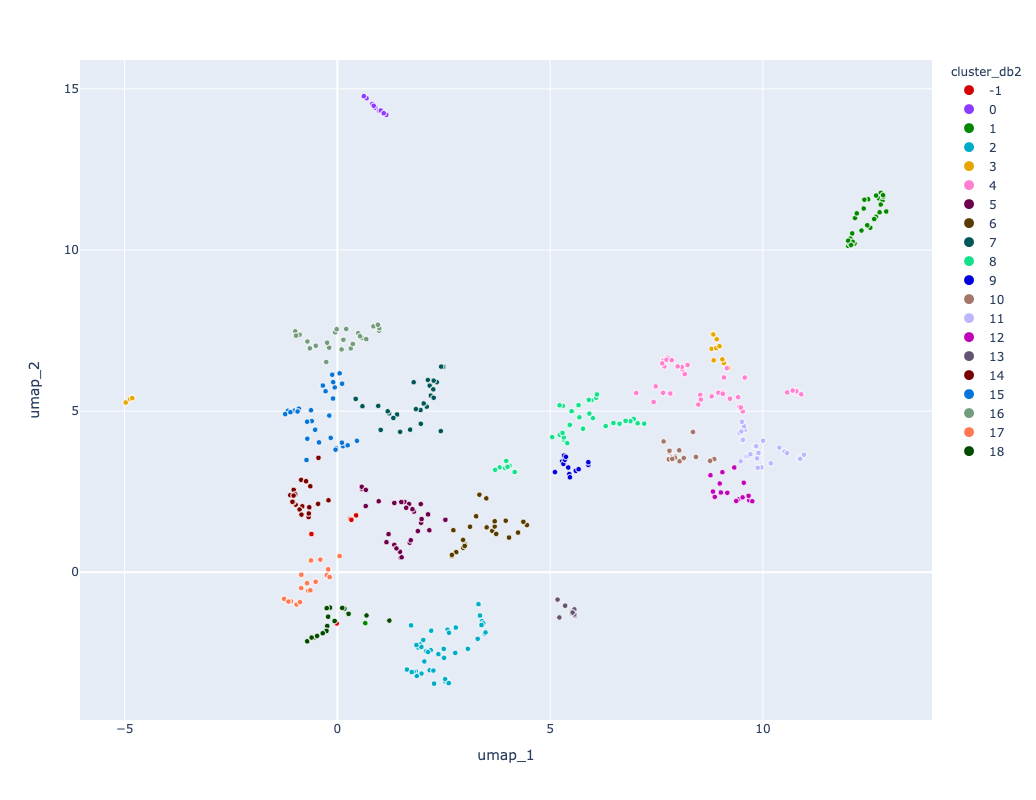

In [146]:
df_plot['umap_1'] = u2[:,0]
df_plot['umap_2'] = u2[:,1]
# df_plot['umap_3'] = u2[:,2]
# df_plot['cluster_db2'] = labels
# df_plot['cluster_db2'] = df_plot['cluster_db2'].astype('category')

# n=df_plot['cluster_db2'].nunique()
# cmap = cc.cm.glasbey_dark
# chex = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(n)]
# c_order = {'cluster_db2':list(np.r_[-1, 0:labels.max()+1])}

# fig = px.scatter_3d(df_plot, x='umap_1', y='umap_2', z='umap_3', size=np.repeat(1, df_plot.shape[0]), size_max=15,
#                     hover_name='stn_name',color='cluster_db2',
#                     color_discrete_sequence=chex,
#                     category_orders=c_order,
#                     opacity=1,
#                     width=800, height=800)
# fig.update_scenes(xaxis_showspikes=False)
# fig.update_scenes(yaxis_showspikes=False)
# fig.update_scenes(zaxis_showspikes=False)

fig = px.scatter(df_plot, x='umap_1', y='umap_2', size=np.repeat(1, df_plot.shape[0]), size_max=4,
                    hover_name='stn_name',color='cluster_db2',
                    color_discrete_sequence=chex,
                    category_orders=c_order,
                    opacity=1,
                    width=800, height=800)

fig.show()

## use the glasbey colormap from the colorcet pacakge

In [ ]:
from colorcet.plotting import swatch, swatches, candy_buttons
import holoviews as hv
hv.extension('bokeh')
swatch("glasbey_bw")

In [ ]:
candy_buttons('glasbey_dark')

In [ ]:
n=df_plot['cluster_db2'].nunique()
# cmap = matplotlib.cm.get_cmap('Paired', n)
cmap = cc.cm.glasbey_dark
chex = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(n)]

## 3D scatter plot of the new cluster from hdbscan of 3d UMAP

In [ ]:
# df_plot = pd.merge(df_data, df[['Latitude', 'Longitude', 'stn_code']], how='left', on='stn_code')

# df_plot['umap_1'] = u[:,0]
# df_plot['umap_2'] = u[:,1]
# df_plot['umap_3'] = u[:,2]

In [ ]:
fit = umap.UMAP(n_neighbors=nn,
                min_dist=0.,
                local_connectivity=1,
                n_components=nc,
                metric='manhattan')
u = fit.fit_transform(data.iloc[:,n_catcols:].values)
df_plot['umap_1'] = u[:,0]
df_plot['umap_2'] = u[:,1]
df_plot['umap_3'] = u[:,2]
   

df_plot['size'] = 1
fig = px.scatter_3d(df_plot, x='umap_1', y='umap_2', z='umap_3', size='size', size_max=15,
                    hover_name='stn_name',color='cluster_db2',
                    hover_data={'umap_1':None,
                               'umap_2':None,
                               'umap_3':None,
                               'size':None,
#                                'cluster':None
                               },
                    color_discrete_sequence=chex,
                    category_orders=c_order,
                    opacity=1,
                    width=800, height=800)

fig.update_scenes(xaxis_showspikes=False)
fig.update_scenes(yaxis_showspikes=False)
fig.update_scenes(zaxis_showspikes=False)

fig.show()

In [ ]:
n=df_plot['cluster_db2'].nunique()
cmap = cc.cm.glasbey_dark
chex = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(n)]

In [ ]:
df_plot['size'] = 1

fig = px.scatter_3d(df_plot, x='umap_1', y='umap_2', z='umap_3', size='size', size_max=15,
                    hover_name='stn_name',color='cluster_db2',
                    hover_data={'umap_1':None,
                               'umap_2':None,
                               'umap_3':None,
                               'size':None,
#                                'cluster':None
                               },
                    color_discrete_sequence=chex,
                    category_orders=c_order,
                    opacity=1,
                    width=800, height=800)

fig.update_scenes(xaxis_showspikes=False)
fig.update_scenes(yaxis_showspikes=False)
fig.update_scenes(zaxis_showspikes=False)

fig.show()

In [ ]:
map_weather = weather.map_with_marker(lat=df_plot['Latitude'], lng=df_plot['Longitude'], label1=df_plot['stn_name'], 
                              label2=df_plot['cluster_db2'], color=df_plot['cluster_db2'].astype('category').cat.codes, 
                              cmap=chex, location='Taiwan', zoom=8)
map_weather